# 1. Clustering for Dataset Exploration


In [5]:
from sklearn.datasets import load_iris
data = load_iris(as_frame=True)

In [10]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters = 3)
samples = data['data']
# Fit model to data
model.fit(samples)
labels = model.predict(samples)
print(labels)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


In [14]:
samples

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


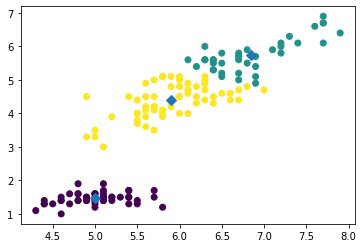

In [26]:
import matplotlib.pyplot as plt
xs = samples.iloc[:,0]
ys = samples.iloc[:,2]
plt.scatter(xs, ys, c=labels)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,2]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker = 'D', s=50)

plt.show()


## Evaluating a clustering


In [102]:
import pandas as pd
data =  pd.read_csv("seeds.csv",index_col=False)

In [103]:
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [115]:
samples = []
for i, row in data.iterrows():
    
    samples.append(list(row))

In [117]:
len(samples)

210

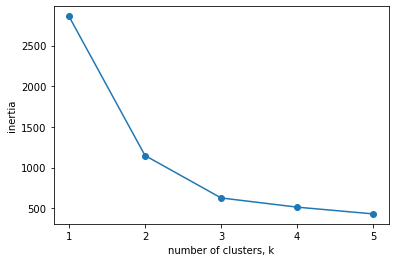

In [118]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [119]:
varieties = list(data['Unnamed: 7'])
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)


varieties   1   2   3
labels               
0          64  10   0
1           1  60   0
2           5   0  70


## Transforming features for better clusterings

In [169]:
data_fish =  pd.read_csv("fish.csv",index_col=False)
samples = []
species = []
for i, row in data_fish.iterrows():
    samples.append(list(row[1:]))
    species.append(row[0])

In [171]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)

In [172]:
# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# without scaling
labels_without_scaling = kmeans.fit_predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'species': species,'labels_without':labels_without_scaling})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['species'])
ct_without = pd.crosstab(df['labels_without'],df['species'])
# Display ct
print(ct)
print('\n')
print(ct_without)


species  Bream  Pike  Roach  Smelt
labels                            
0           33     0      1      0
1            0     0      0     13
2            0    17      0      0
3            1     0     19      1


species         Bream  Pike  Roach  Smelt
labels_without                           
0                  17    10      3      0
1                  16     2      0      0
2                   1     1     17     14
3                   0     4      0      0


In [164]:
data_stock = pd.read_csv('company-stock-movements-2010-2015-incl.csv')
movements = []
companies = []
for i, row in data_stock.iterrows():
    movements.append(list(row[1:]))
    companies.append(row[0])

In [165]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer,kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

In [166]:
# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))


    labels                           companies
29       0                     Lookheed Martin
36       0                    Northrop Grumman
4        0                              Boeing
37       1                            Novartis
19       1                     GlaxoSmithKline
42       1                   Royal Dutch Shell
43       1                                 SAP
44       1                        Schlumberger
46       1                      Sanofi-Aventis
10       1                      ConocoPhillips
12       1                             Chevron
49       1                               Total
52       1                            Unilever
6        1            British American Tobacco
53       1                       Valero Energy
57       1                               Exxon
41       2                       Philip Morris
39       2                              Pfizer
54       2                            Walgreen
38       2                               Pepsi
56       2   

# 2. Visualization with Hierarchical Clustering and t-SNE

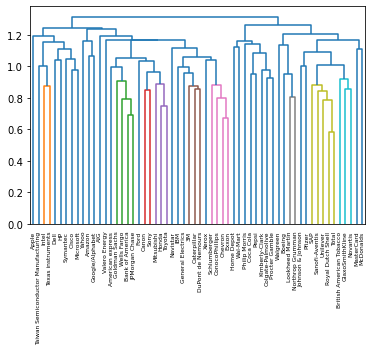

In [167]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(mergings, labels=companies, leaf_rotation=90,leaf_font_size=6)
plt.show()


In [174]:
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster
mergings = linkage(samples, method='complete')
# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'species': species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['species'])

# Display ct
print(ct)


species  Bream  Pike  Roach  Smelt
labels                            
1            0     1      0      0
2            0     1      0      0
3            0     1      0      0
4            0     1      0      0
5            1     0      0      0
6            0     0      1      0
7            1     0      0      0
8            1     0      0      0
9            0     1      0      0
10           0     3      0      0
11           1     0      0      0
12           0     0      1      0
13           0     0      1      0
14           1     0      0      0
15           0     0      0      2
16           0     0      0      3
17           0     0      0      9
18           0     0      1      0
19           0     0      1      0
20           0     0      1      0
21           0     1      0      0
22           0     0      3      0
23           0     0      1      0
24           0     0      1      0
25           0     0      1      0
26           0     0      1      0
27           0     0

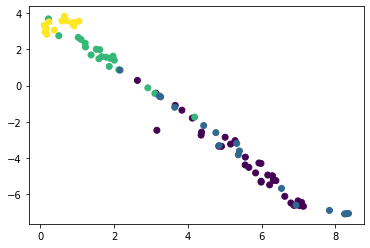

In [196]:
# Import TSNE
from sklearn.manifold import TSNE
# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

species_number=[]
for i in species:
    if i=='Bream':
        species_number.append(0)
    if i=='Pike':
        species_number.append(1)
    if i=='Roach':
        species_number.append(2)
    if i=='Smelt':
        species_number.append(3)

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys, c=species_number)
plt.show()


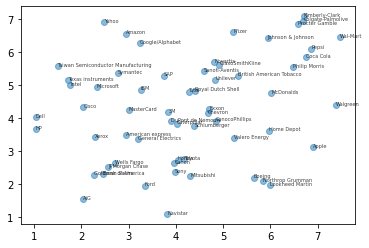

In [197]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs,ys,alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()


# 3. Decorrelating Your Data and Dimension Reduction

PCA : Principle Component Analysis

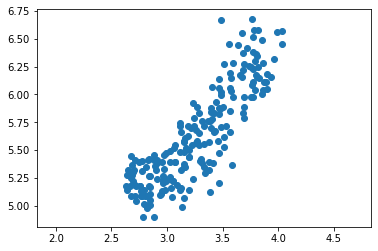

0.8604149377143463


In [204]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

grains = pd.read_csv('seeds-width-vs-length.csv')
# Assign the 0th column of grains: width
width = grains.iloc[:,0]

# Assign the 1st column of grains: length
length = grains.iloc[:,1]

# Scatter plot width vs length
plt.scatter(width,length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width,length)

# Display the correlation
print(correlation)


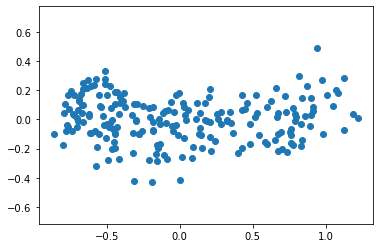

4.412702842016003e-17


In [205]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

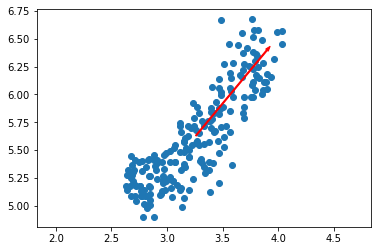

In [207]:
# Make a scatter plot of the untransformed points
plt.scatter(grains.iloc[:,0], grains.iloc[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

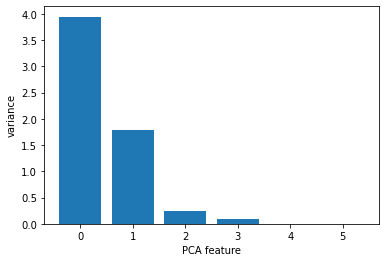

In [208]:
data_fish =  pd.read_csv("fish.csv",index_col=False)
samples = []
species = []
for i, row in data_fish.iterrows():
    samples.append(list(row[1:]))
    species.append(row[0])
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


In [209]:
# Import PCA
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled_samples = scaler.fit_transform(samples)
# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)


# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)


(85, 2)


In [211]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)


[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


# 4. Discovering Interpretable Features

Non-negative matrix factorization (NMF)

In [ ]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features.round(2))


In [ ]:
# Import pandas
import pandas as pd
# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway',:])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington',:])


False
